### Data preprocessing

Usage of FeatureExtractor from the expert/data folder to transcribe audio, get speech time intervals, and extract faces

In [1]:
import torch
import pandas as pd

from expert.data.feature_extractor import FeatureExtractor
from expert.data.annotation.speech_to_text import get_phrases

/home/ismirnov/.conda-envs/segmentation/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package omw-1.4 to /home/ismirnov/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
video_path = "mj_test.mp4"

In [3]:
feature_extractor = FeatureExtractor(video_path=video_path, stt_mode="local", device=torch.device("cpu"))

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Feature extraction. get_features method returns the path to the folder with the reports which are json files with the features. 

In [4]:
features_path = feature_extractor.get_features()

Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v1.9.4. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file ../../../home/ismirnov/.cache/torch/pyannote/models--pyannote--segmentation/snapshots/c4c8ceafcbb3a7a280c2d357aee9fbc9b0be7f9b/pytorch_model.bin`
100%|██████████| 1/1 [00:59<00:00, 59.41s/it]


### Transcribation

In [4]:
import json

with open(features_path + "/transcription.json") as f:
    transcribation = json.load(f)

In [5]:
phrases = get_phrases(transcribation)

In [6]:
pd.set_option('display.max_rows', 162)
pd.set_option('display.max_colwidth', 10000)

pd.DataFrame(phrases)

,time,text
0,"[0.98, 11.66]","Not from unnamed sources and not from unsanctioned, but for me. So that you can get a good idea of"
1,"[11.66, 22.78]","how I'm feeling, ask me questions, and hear what I truly believe at this moment in time about usada, and it's ongoing examination of me. I"
2,"[22.78, 32.92]","have been patient. I have been cooperative, and I have done all I can do to provide you, so with information that I have knowledge of, because I believe in"
3,"[32.92, 43.1]","a drug free sport, and having a drug free Olympic team. Throughout all of this, I have maintained my sincere belief that if the process is fair,"
4,"[43.7, 53.82]","that in the end, the truth would prevail, and my name would be cleared. However, the events of the last several weeks have led me more"
5,"[53.82, 64.72]","in sadness than in anger, to the conclusion that you sawdda is not engaged in a fair process. Let's all review the facts. I"
6,"[64.72, 74.9]","have never, ever failed a drug test. I have taken over 160 drug tests. I have taken tests"
7,"[74.9, 85.22]","before, during, and after the 2000 Olympics, and have never failed a test. Musada has no information"
8,"[85.22, 95.46]","that shows that I have ever failed a test, because simply I have never failed a test, and no information exists anywhere"
9,"[95.46, 105.54]",to even suggest that I have ever failed a test. I have truthfully answered every question asked of me under oath by


### Congruence

In [7]:
import torch

from expert.core.congruence import CongruenceDetector

By default, for preprocessing reports, "temp" directory and a folder named as the analysed video file are created in it. All other files are taken by the name of the modules

In [10]:
cong_detector = CongruenceDetector(video_path=video_path,
                                   features_path=features_path + "/features.json",
                                   face_image=features_path + "/faces/0.jpg",
                                   diarization_path=features_path + "/diarization.json",
                                   transcription_path=features_path + "/transcription.json",
                                   device=torch.device("cpu"))

get_congruence method returns the dictionary with features {"emotions": emotions_data, "congruence": cong_data} and creates json files in correspondig folder.

In [11]:
results = cong_detector.get_congruence()

### Visualization of results

Pyplot is used to create interactive data. There may be a conflict with pytorch-lightning, it is not used in congruence

!pip install plotly

!pip install nbformat>=4.2.0

In [12]:
import plotly.express as px
import plotly.graph_objects as go

video_emo = pd.DataFrame(results["emotions"]["video"])
audio_emo = pd.DataFrame(results["emotions"]["audio"])
text_emo = pd.DataFrame(results["emotions"]["text"])

Visualization of the emotions by the modality

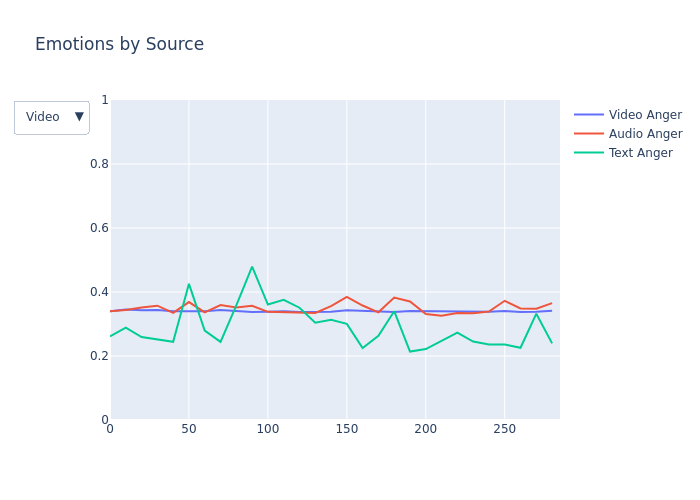

In [25]:
trace_video = go.Scatter(x=video_emo['time_sec'], y=video_emo['video_anger'], name='Video Anger')
trace_audio = go.Scatter(x=audio_emo['time_sec'], y=audio_emo['audio_anger'], name='Audio Anger')
trace_text = go.Scatter(x=text_emo['time_sec'], y=text_emo['text_anger'], name='Text Anger')

# Create buttons to switch between datasets
updatemenus = [{'buttons': [
    {'method': 'update', 'label': 'Video', 'args': [{'y': [video_emo['video_anger'], video_emo['video_neutral'], video_emo['video_happiness']]}]},
    {'method': 'update', 'label': 'Audio', 'args': [{'y': [audio_emo['audio_anger'], audio_emo['audio_neutral'], audio_emo['audio_happiness']]}]},
    {'method': 'update', 'label': 'Text', 'args': [{'y': [text_emo['text_anger'], text_emo['text_neutral'], text_emo['text_happiness']]}]}
], 'direction': 'down', 'showactive': True}]

# Create layout with buttons
layout = go.Layout(title='Emotions by Source', updatemenus=updatemenus)

fig = go.Figure(data=[trace_video, trace_audio, trace_text], layout=layout)
fig.update_xaxes(range=[0, text_emo['time_sec'].max()+5])
fig.update_yaxes(range=[0, 1])
fig.show()
# fig.show('png')

Visualization of the congruence level

In [19]:
congr_data = pd.DataFrame(results["congruence"])

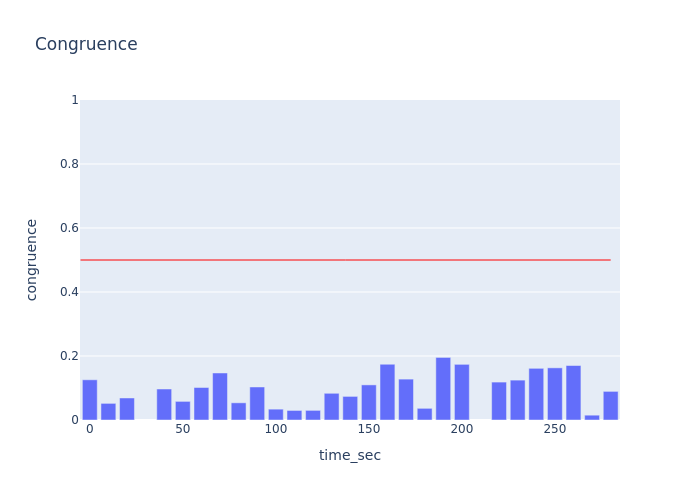

In [24]:
fig = px.bar(congr_data, x="time_sec", y="congruence", title='Congruence')
fig.add_shape(type='line',
              x0=-5, y0=0.5,
              x1=video_emo["time_sec"][video_emo.shape[0]-1], y1=0.5,
              line=dict(color='red', width=1))
fig.update_yaxes(range=[0, 1])
fig.show()
# fig.show('png')